In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Advertising.csv')

In [7]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


1.Explain the dataset

In [4]:
len(data)

200

In [6]:
data.shape

(200, 5)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Plotting Heatmap

In [41]:
x=data.drop(labels=['Unnamed: 0'],axis=1)

<AxesSubplot:>

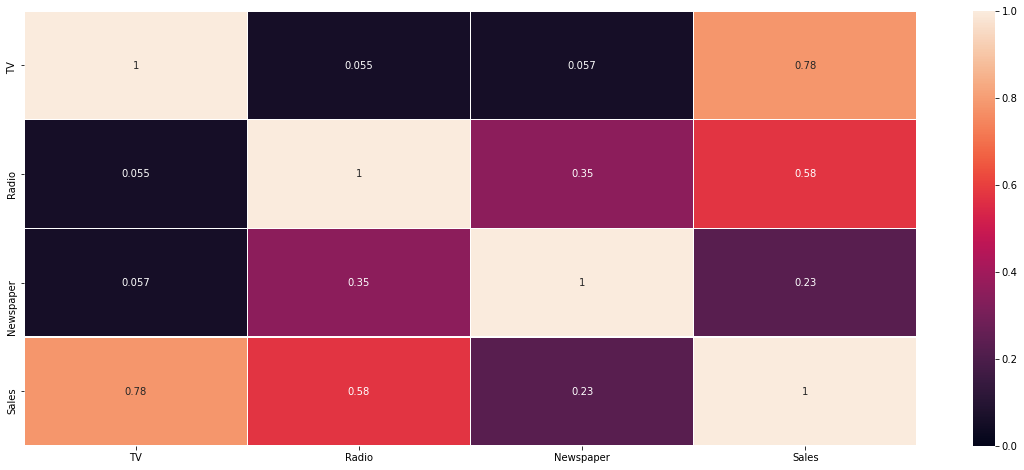

In [39]:
corrmatrix=x.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0,vmax=1,annot=True,linewidth=0.3)

In [40]:
corrmatrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


1.Our data contains 200 observation splitting over 5 columns in which the column indicates the ad on TV, Radio,Newspaper and
  the corresponding Sales.The Heatmap indicating that there is a high positive correlation between the ads on TV, Radio and
  Newspaper with the sales.Among them, ad on TV is highly correlated with Sales.

2).Summary Statistics

In [27]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Out of the 200 data the max value contained by TV,Radio,Newspaper and Sales are 296.4,49.6,114,27 respectively also their 
Minimum values are 0.7,0,0.30,1.6 respectively.

3).The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper).

In [29]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

H0:Same amount spent for the three advertisement.
H1:Different amount spent for the three advertisement.

In [31]:
fvalue,pvalue=stats.f_oneway(data['TV'],data['Radio'],data['Newspaper'])
print(fvalue,pvalue)

358.8514595342597 4.552931539744962e-103


In [36]:
model=ols('Sales~TV+Radio+Newspaper+TV*Radio*Newspaper',data=data).fit()
aov=sm.stats.anova_lm(model,Type=2)
print(aov)

                       df       sum_sq      mean_sq            F  \
TV                    1.0  3314.618167  3314.618167  3746.660843   
Radio                 1.0  1545.616603  1545.616603  1747.079426   
Newspaper             1.0     0.088717     0.088717     0.100281   
TV:Radio              1.0   382.513569   382.513569   432.372159   
TV:Newspaper          1.0     4.192310     4.192310     4.738755   
Radio:Newspaper       1.0     0.189422     0.189422     0.214113   
TV:Radio:Newspaper    1.0     0.070261     0.070261     0.079419   
Residual            192.0   169.859700     0.884686          NaN   

                           PR(>F)  
TV                  6.515011e-128  
Radio                2.343475e-98  
Newspaper            7.518368e-01  
TV:Radio             4.708336e-51  
TV:Newspaper         3.071054e-02  
Radio:Newspaper      6.440868e-01  
TV:Radio:Newspaper   7.783893e-01  
Residual                      NaN  


In [ ]:
1.To find out whether the same amount was spent for the 3 advertisement here we check the relationship or effect of the 
  3 advertisement on sales
2.From the output the P-value for TV is less than the significant value 0.05 so we reject the null hypothesis and p-value 
  for Radio is also very small comparing to the value 0.05 and the same is happening for Newspaper.
3.Thus,we can conclude that the manager spent different amount for the three advertisement.